In [1]:
import pandas as pd
import csv
from collections import defaultdict, Counter
import seaborn as sb
sb.set()

In [2]:
df = pd.read_csv("D:\Open Classroom\StackOverflow Dev Survey\developer_survey_2019\survey_results_public.csv")
pd.set_option("display.max_rows", 85)
pd.set_option("display.max_columns", 100)
df.head(10)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [3]:
with open("D:\Open Classroom\StackOverflow Dev Survey\developer_survey_2019\survey_results_public.csv", encoding = "utf-8")as file:
    fileReader = csv.DictReader(file)
    
    fileCounter = Counter()
    
    for country in fileReader:
        database = country["LanguageDesireNextYear"].split(";")
        
        for dbase in database:
            fileCounter[dbase] += 1
            
    print(fileCounter.most_common())
        

[('JavaScript', 44739), ('Python', 40006), ('HTML/CSS', 36645), ('SQL', 33566), ('TypeScript', 23720), ('Java', 23508), ('C#', 22449), ('Bash/Shell/PowerShell', 21303), ('Go', 17060), ('C++', 16856), ('Kotlin', 13261), ('PHP', 12837), ('C', 11143), ('Rust', 10497), ('Swift', 8800), ('WebAssembly', 8440), ('Other(s):', 7912), ('Ruby', 7251), ('R', 6734), ('Scala', 5562), ('NA', 4795), ('Assembly', 4659), ('Dart', 4429), ('Elixir', 3788), ('F#', 3521), ('Objective-C', 2851), ('Clojure', 2752), ('Erlang', 2124), ('VBA', 1641)]


In [4]:
lang = df["LanguageWorkedWith"].str.contains("Python", na = False)
print(df.loc[lang, ["LanguageWorkedWith", "Country"]])

                                      LanguageWorkedWith  \
0                        HTML/CSS;Java;JavaScript;Python   
1                                    C++;HTML/CSS;Python   
3                                    C;C++;C#;Python;SQL   
4            C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA   
7      Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...   
...                                                  ...   
88854  Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...   
88860    Bash/Shell/PowerShell;C++;Python;Ruby;Other(s):   
88865    Bash/Shell/PowerShell;HTML/CSS;Python;Other(s):   
88872           C;C++;HTML/CSS;JavaScript;PHP;Python;SQL   
88876                         HTML/CSS;JavaScript;Python   

                      Country  
0              United Kingdom  
1      Bosnia and Herzegovina  
3               United States  
4                     Ukraine  
7                       India  
...                       ...  
88854          United Kingdom  
88860                  

In [5]:
dt = pd.read_csv("https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv")
pd.set_option("display.max_rows", 100)
dt.head(5)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [6]:
#Output the date column and check its dtype
dt.loc[0, "Date"]

'2020-03-13 08-PM'

In [7]:
#Convert the str format to datetime in pandas
dt["Date"] = pd.to_datetime(dt["Date"], format = "%Y-%m-%d %I-%p")
dt.head(10)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
5,2020-03-13 15:00:00,ETHUSD,128.39,128.90,116.06,124.85,7378976.00
6,2020-03-13 14:00:00,ETHUSD,134.03,137.90,125.50,128.39,3733916.89
7,2020-03-13 13:00:00,ETHUSD,131.35,140.95,128.99,134.03,9582732.93
8,2020-03-13 12:00:00,ETHUSD,128.93,134.60,126.95,131.35,3906590.52
9,2020-03-13 11:00:00,ETHUSD,132.60,133.17,126.01,128.93,3311080.29


In [8]:
dt.loc[69, "Date"].day_name()

'Tuesday'

In [9]:
#view the day name of the entire series
dt["Date"].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [10]:
#Set the day name as a new column of the dataframe
dt["DayOfWeek"] = dt["Date"].dt.day_name()
dt

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [11]:
#Use min func to access the earliest date
minDate = dt["Date"].min()
#Use max func to access the latest date
maxDate = dt["Date"].max()
#Print out 
minDate, maxDate
tDelta = (dt["Date"].max()) - (dt["Date"].min())
tDelta

Timedelta('986 days 09:00:00')

In [12]:
#Filter certain date series 
dateFilt = (dt["Date"] >= "2019") & (dt["Date"] < "2020")
dt.loc[dateFilt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [13]:
#Alternatively you can convert the string to datetime format
dateFilt2 = (dt["Date"] >= pd.to_datetime("2017-01-01")) & (dt["Date"] <= pd.to_datetime("2018-12-31"))
dt.loc[dateFilt2]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
10532,2018-12-31 00:00:00,ETHUSD,138.78,138.90,137.17,137.65,921710.89,Monday
10533,2018-12-30 23:00:00,ETHUSD,137.93,139.24,137.83,138.78,1804874.07,Sunday
10534,2018-12-30 22:00:00,ETHUSD,138.14,138.50,137.40,137.93,690518.21,Sunday
10535,2018-12-30 21:00:00,ETHUSD,137.12,139.33,136.88,138.14,1710290.07,Sunday
10536,2018-12-30 20:00:00,ETHUSD,137.00,138.00,136.00,137.12,1187978.66,Sunday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [14]:
#You can as well set index to the date series and slice for filtering 
dt.set_index("Date", inplace = True)
dt["2018"] # .loc()
dt["2018-01":"2018-03"]

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2018-03-31 23:00:00,ETHUSD,396.41,397.08,392.16,394.54,1178026.85,Saturday
2018-03-31 22:00:00,ETHUSD,395.01,397.13,394.01,396.41,1461745.50,Saturday
2018-03-31 21:00:00,ETHUSD,394.53,395.92,391.50,395.01,910011.35,Saturday
2018-03-31 20:00:00,ETHUSD,399.90,399.90,391.12,394.53,2074139.30,Saturday
2018-03-31 19:00:00,ETHUSD,400.01,401.77,397.00,399.90,1224941.67,Saturday
...,...,...,...,...,...,...,...
2018-01-01 04:00:00,ETHUSD,739.70,748.07,733.02,747.90,3180304.69,Monday
2018-01-01 03:00:00,ETHUSD,730.01,739.70,728.66,739.70,3461348.11,Monday
2018-01-01 02:00:00,ETHUSD,730.02,730.50,727.14,730.01,2950627.37,Monday


In [15]:
dt["2020-02-01"]["High"].max()

184.2

In [16]:
dt["2018-01":"2018-03"]["Close"].mean()

861.609324074074

In [17]:
#Resampling to view the highest value by month
monthMax = dt["High"].resample("M").max().head(30)
monthMax

Date
2017-07-31     293.73
2017-08-31     392.00
2017-09-30     396.88
2017-10-31     350.00
2017-11-30     518.13
2017-12-31     875.00
2018-01-31    1419.96
2018-02-28    1143.00
2018-03-31     878.00
2018-04-30     711.00
2018-05-31     828.97
2018-06-30     627.83
2018-07-31     515.88
2018-08-31     435.48
2018-09-30     302.20
2018-10-31     234.92
2018-11-30     222.78
2018-12-31     159.51
2019-01-31     160.61
2019-02-28     165.62
2019-03-31     147.00
2019-04-30     187.62
2019-05-31     288.77
2019-06-30     364.49
2019-07-31     318.60
2019-08-31     239.45
2019-09-30     224.71
2019-10-31     199.50
2019-11-30     194.60
2019-12-31     153.00
Freq: M, Name: High, dtype: float64

In [18]:
endYearMax = dt["High"].resample("A").max()
endYearMax

Date
2017-12-31     875.00
2018-12-31    1419.96
2019-12-31     364.49
2020-12-31     290.00
Freq: A-DEC, Name: High, dtype: float64

In [19]:
highs = dt["High"].resample("M").max()
highs["2019-07"]

Date
2019-07-31    318.6
Freq: M, Name: High, dtype: float64

In [20]:
%matplotlib inline

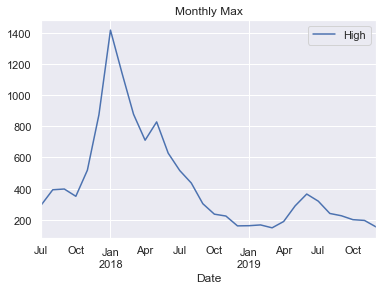

In [21]:
monthMax.plot(legend = "High", title = "Monthly Max")

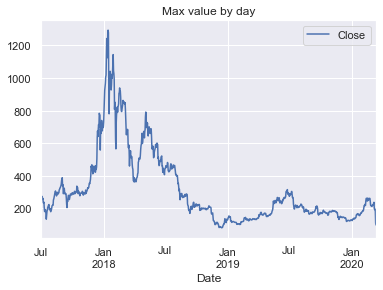

In [22]:
dayMax = dt["Close"].resample("D").min()
dayMax.plot(legend = True, title = "Max value by day")

,Close,High,Low,Volume
Date,,,,
2017-07-01 11:00:00,275.01,279.99,272.1,679358.87
2017-07-01 12:00:00,274.83,275.01,271.0,824362.87
2017-07-01 13:00:00,268.79,274.93,265.0,3010787.99
2017-07-01 14:00:00,265.74,269.90,265.0,1702536.85
2017-07-01 15:00:00,272.57,272.74,265.0,1500282.55


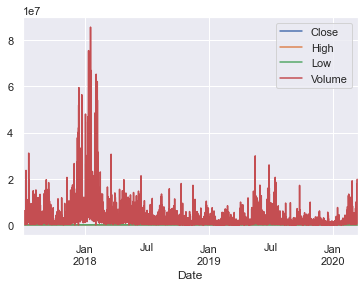

In [23]:
#resample method allows for passing in a dictionary of columns you want to perform aggregate on
dframe = dt.resample("t").agg({"Close": "mean", "High": "max", "Low": "min", "Volume": "sum"})
dframe.dropna(axis = "index", how = "any").plot()
dframe.dropna(axis = "index", how = "any").head()

In [24]:
dt["Volume"].resample("w").max()
dt["2018-01"]

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2018-01-31 23:00:00,ETHUSD,1093.00,1105.39,1090.00,1105.00,10373308.50,Wednesday
2018-01-31 22:00:00,ETHUSD,1087.40,1093.00,1085.15,1093.00,6967638.48,Wednesday
2018-01-31 21:00:00,ETHUSD,1090.00,1091.50,1083.38,1087.40,4744564.42,Wednesday
2018-01-31 20:00:00,ETHUSD,1088.00,1091.00,1078.20,1090.00,8222214.02,Wednesday
2018-01-31 19:00:00,ETHUSD,1097.09,1098.00,1080.50,1088.00,6863516.24,Wednesday
...,...,...,...,...,...,...,...
2018-01-01 04:00:00,ETHUSD,739.70,748.07,733.02,747.90,3180304.69,Monday
2018-01-01 03:00:00,ETHUSD,730.01,739.70,728.66,739.70,3461348.11,Monday
2018-01-01 02:00:00,ETHUSD,730.02,730.50,727.14,730.01,2950627.37,Monday


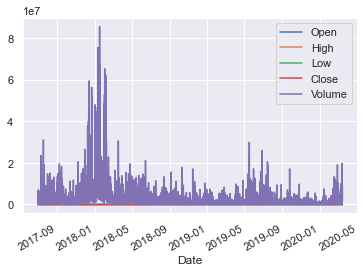

In [25]:
dt.resample("y").agg({"Close": "mean", "High": "max", "Low": "min", "Volume": "sum"})
dt["2017": "2020"].plot(legend = "Volume")